In [9]:
import matplotlib.pyplot 
import numpy as np
import pandas as pd
import quandl as ql
import yfinance as yf
from tqdm.notebook import trange, tqdm
import networkx as nx

In [25]:
ql.ApiConfig.api_key = "Yyz4Xrfg61cKogbzmwjq"

In [26]:
#Data Range and Data Origin
#3000 stocsk 
start = '2010-10-01'
end = '2020-10-01'
data = ql.bulkdownload("WIKI")

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.

In [41]:
data = ql.get_table("WIKI/PRICES", qopts = {'columns': ['ticker', 'date', 'adj_close']}, paginate=True)

LimitExceededError: This call exceeds the amount of data that quandl.get_table() allows.         Please use the following link in your browser, which will download the full results as         a CSV file: https://www.quandl.com/api/v3/datatables/WIKI/PRICES?qopts.export=true&api_key=Yyz4Xrfg61cKogbzmwjq . See         our API documentation for more info:         https://docs.quandl.com/docs/in-depth-usage-1#section-download-an-entire-table

In [42]:
data

Date
2010-10-01     20.60
2010-10-04     20.99
2010-10-05     21.12
2010-10-06     20.46
2010-10-07     20.43
               ...  
2018-03-21    316.53
2018-03-22    309.10
2018-03-23    301.54
2018-03-26    304.18
2018-03-27    279.18
Name: Adj. Close, Length: 1883, dtype: float64

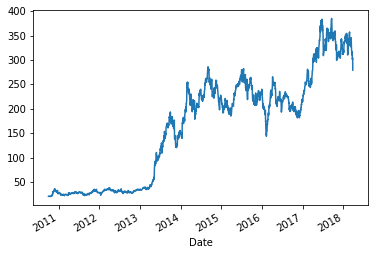

In [39]:
data.plot()

# Small Data Script

### Get Sp500 names

In [81]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500 = pd.read_html(url)
sp500 = sp500[0]['Symbol']
sp500 = list(sp500)
print(len(sp500))
sp500.remove('BRK.B')
sp500.remove('BF.B')
print(len(sp500))

506
504


### Collect Data

In [259]:
test = []
for i in tqdm(sp500):
    ticket = yf.Ticker(i)
    test.append(ticket.history(period = "700d")['Close'].dropna.astype(int))


AttributeError: 'function' object has no attribute 'astype'

In [17]:
data = ql.get("WIKI/TSLA", start_date = start, end_date = end)['Adj. Close']

Date
2010-10-01     20.60
2010-10-04     20.99
2010-10-05     21.12
2010-10-06     20.46
2010-10-07     20.43
               ...  
2018-03-21    316.53
2018-03-22    309.10
2018-03-23    301.54
2018-03-26    304.18
2018-03-27    279.18
Name: Adj. Close, Length: 1883, dtype: float64

In [211]:
df = pd.DataFrame(columns = sp500, index = ['values'])

In [215]:
for c,i in enumerate(df.columns):
    df[i] = test[c]

ValueError: cannot reindex from a duplicate axis

In [237]:
df = pd.DataFrame([test], columns = sp500, index = ['values'])

In [240]:
df

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
values,Date 2018-02-12 208.236023 2018-02-13 21...,Date 2018-02-12 54.857361 2018-02-13 5...,Date 2018-02-12 95.897003 2018-02-13 9...,Date 2018-02-12 233.720001 2018-02-13 23...,Date 2018-02-12 147.932632 2018-02-13 14...,Date 2018-02-12 66.987373 2018-02-13 66....,Date 2018-02-12 192.149994 2018-02-13 19...,Date 2018-02-12 11.680000 2018-02-13 11....,Date 2018-02-12 108.269226 2018-02-13 10...,Date 2018-02-12 9.336019 2018-02-13 9....,...,Date 2018-02-12 153.434799 2018-02-13 15...,Date 2018-02-12 40.414783 2018-02-13 40....,Date 2018-02-12 26.722221 2018-02-13 26....,Date 2018-02-12 62.354519 2018-02-13 6...,Date 2018-02-12 69.280113 2018-02-13 70....,Date 2018-02-12 74.373779 2018-02-13 7...,Date 2018-02-12 116.010002 2018-02-13 11...,Date 2018-02-12 113.954254 2018-02-13 11...,Date 2018-02-12 47.849636 2018-02-13 47....,Date 2018-02-12 72.001961 2018-02-13 7...


In [239]:
df.corr()

""


In [68]:
df.index = df['Ticket']

In [70]:
df.drop('Ticket', axis = 1, inplace = True)

In [108]:
corr_matrix = df.corr()

In [110]:
corr_matrix.to_csv('corr_matrix.csv')

In [ ]:
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)

In [104]:
df.to_csv('stocks_in_columns.csv')

In [14]:
df.to_csv('stock_data.csv')

NameError: name 'df' is not defined

In [76]:
import networkx as nx

In [267]:
df = pd.read_csv('stocks_in_columns.csv')

In [278]:
for i in tqdm(df.columns):
    if i not in sp500:
        df.drop(i, axis=1, inplace = True)
        

In [285]:
df.to_csv('small_data.csv')

In [289]:
m = df.corr()

In [291]:
G = nx.from_pandas_adjacency(m)

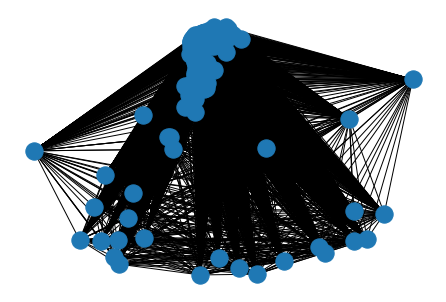

In [342]:
nx.draw(G)

In [318]:
print(G.number_of_nodes())
print(G.number_of_edges())
#print(list(nx.find_cliques(G)))# 1 clique
print(nx.average_clustering(G))
cent =nx.eigenvector_centrality(G)

477
114003
1.0


In [334]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

In [343]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence) 


Calculating best minimal value for power law fit
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.


In [402]:
threshold10 = m

In [403]:
for i in  tqdm(m.columns):
    for j in m.index:
        if( m[i].loc[j] <= .10):
            threshold10[i].loc[j] = np.nan
            

In [351]:
G10 = nx.from_pandas_adjacency(threshold10)